#### ※ 노이즈 제거 (mnist)


In [ ]:
import tensorflow as tf

# 1. Fashion MNIST 데이터셋 불러오기
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
noise_factor = 0.2

X_train_noisy = X_train + noise_factor * tf.random.normal(shape=X_train.shape)
X_test_noisy = X_test + noise_factor * tf.random.normal(shape=X_test.shape)
X_train_noisy = tf.clip_by_value(X_train_noisy,clip_value_min=0., clip_value_max=1.)
X_test_noisy = tf.clip_by_value(X_test_noisy,clip_value_min=0., clip_value_max=1.)

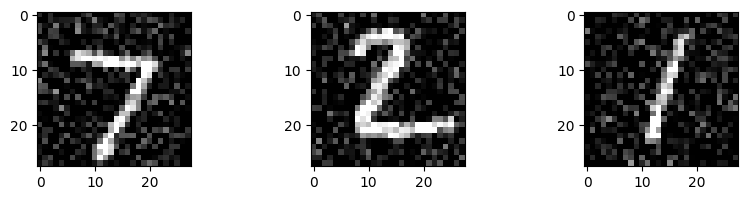

In [ ]:
import matplotlib.pyplot as plt

n=3
plt.figure(figsize=(10, 2))
for i in range(n):
  ax = plt.subplot(1, n, i + 1)
  plt.imshow(tf.squeeze(X_test_noisy[i]))
  plt.gray()
plt.show()

In [ ]:
class Denoise(Model):
  def __init__(self):
   super(Denoise, self).__init__()
   self.encoder = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(16, (3, 3), activation='relu',
                  padding='same', strides=1),
    layers.Conv2D(8, (3, 3), activation='relu',
                  padding='same', strides=1)])
   self.decoder = tf.keras.Sequential([
     layers.Conv2DTranspose(8, kernel_size=3, strides=1,
                           activation='relu', padding='same'),
     layers.Conv2DTranspose(16, kernel_size=3, strides=1,
                           activation='relu', padding='same'),
     layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid',
                           padding='same')])
  def call(self, x):
     encoded = self.encoder(x)
     decoded = self.decoder(encoded)
     return decoded

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

from tensorflow.keras import losses

model = Denoise()
model.compile(optimizer='adam', loss=losses.MeanSquaredError())
model.fit(X_train_noisy, X_train,
         epochs=100,
         shuffle=True,
         validation_data=(X_test_noisy, X_test),
          callbacks=[early_stop])

Epoch 1/100
1875/1875 [==============================] - 12s 5ms/step - loss: 0.0070 - val_loss: 0.0028
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 8/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 9/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step 

In [ ]:
encoded_imgs = model.encoder(X_test_noisy).numpy()
decoded_imgs = model.decoder(encoded_imgs).numpy()

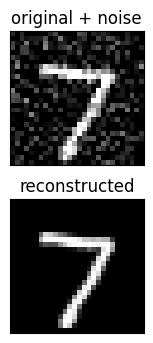

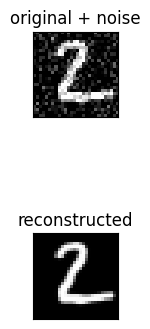

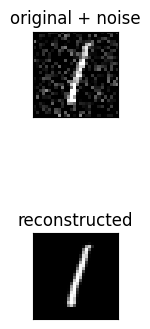

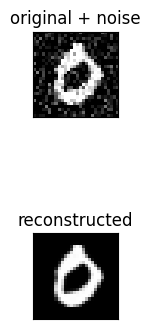

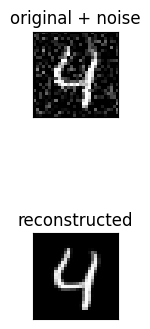

In [ ]:
n= 5
plt.figure(figsize=(10, 4))
for i in range(n):
   # display original + noise
   ax = plt.subplot(2, n, i + 1)
   plt.title("original + noise")
   plt.imshow(tf.squeeze(X_test_noisy[i]))
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)

   # display reconstruction
   bx = plt.subplot(2, n, i + n + 1)
   plt.title("reconstructed")
   plt.imshow(tf.squeeze(decoded_imgs[i]))
   bx.get_xaxis().set_visible(False)
   bx.get_yaxis().set_visible(False)
   plt.show()